## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")


# Display the data table for preview
study_data_complete.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
study_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Checking the number of mice.

len(study_data_complete["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_data_complete[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
clean_complete_df = study_data_complete.dropna(how="any")
clean_complete_df.count()


Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_complete_df = study_data_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])

clean_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_complete_df["Mouse ID"].unique())



249

## Summary Statistics

In [8]:
regimen_cnts = clean_complete_df['Drug Regimen'].value_counts()
regimen_cnts.describe()

count     10.000000
mean     188.800000
std       22.899782
min      156.000000
25%      178.750000
50%      181.500000
75%      187.500000
max      230.000000
Name: Drug Regimen, dtype: float64

In [9]:
grouped_regimen_df = clean_complete_df.groupby(['Drug Regimen'])

grouped_regimen_df.count().head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [10]:
# For each drug in drug_regimen; calculate mean, meadian, variance, standard deviation, and SEM of tumor volume

tumor_avg = grouped_regimen_df['Tumor Volume (mm3)'].mean()
# tumor_avg

tumor_median = grouped_regimen_df['Tumor Volume (mm3)'].median()
# tumor_median

tumor_var = grouped_regimen_df['Tumor Volume (mm3)'].var()
# tumor_var

tumor_std = grouped_regimen_df['Tumor Volume (mm3)'].std()
# tumor_std

tumor_sem = grouped_regimen_df['Tumor Volume (mm3)'].sem()
# tumor_sem



In [11]:
regimen_stat_summary = pd.DataFrame({
    "Tumor Volume (mm3)-Average": tumor_avg,
    "Tumor Volume (mm3)-Median": tumor_median,
    "Tumor Volume (mm3)-Variance": tumor_var,
    "Tumor Volume (mm3)-Standard Deviation": tumor_std,
    "Tumor Volume (mm3)-Sum of Errors": tumor_sem
})

regimen_stat_summary

,Tumor Volume (mm3)-Average,Tumor Volume (mm3)-Median,Tumor Volume (mm3)-Variance,Tumor Volume (mm3)-Standard Deviation,Tumor Volume (mm3)-Sum of Errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_sum_stat_line = grouped_regimen_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

single_sum_stat_line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

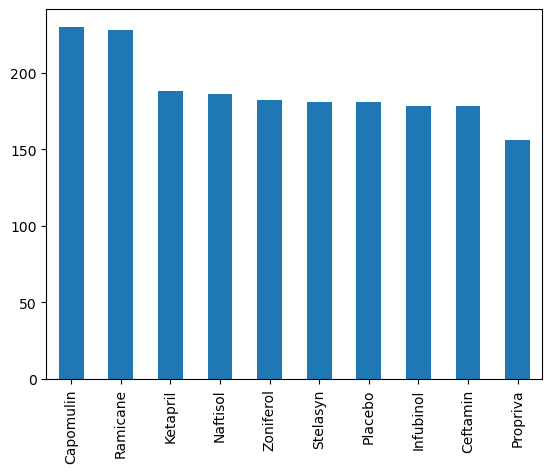

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_cnts.plot(kind="bar")

plt.show()


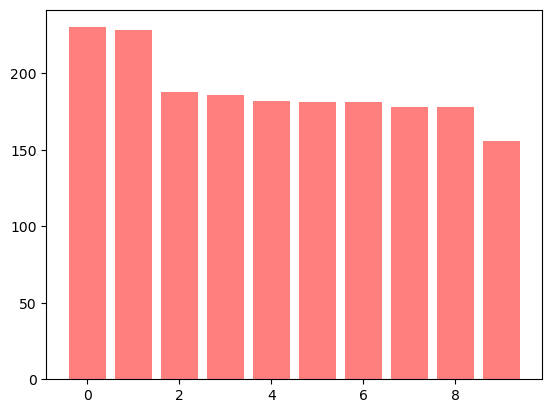

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_cnts))
# tick_locations = for value in x_axis
plt.bar(x_axis, regimen_cnts, color='r', alpha=0.5, align="center")

plt.show()


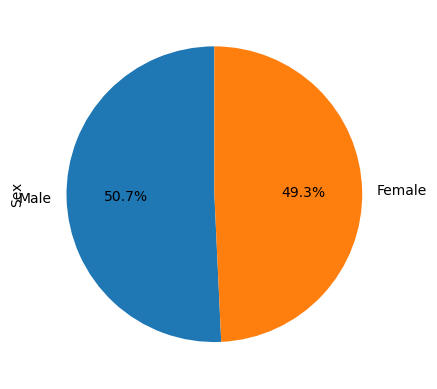

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_complete_df['Sex'].value_counts()
sex_distribution

sex_distribution.plot(kind="pie", autopct='%1.1f%%', startangle=90)

plt.show()


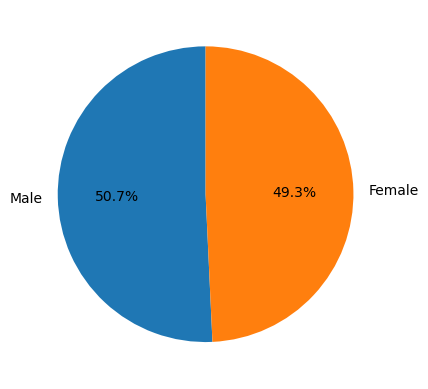

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']

plt.pie(sex_distribution, labels=labels, autopct='%1.1f%%',
        startangle=90)

plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped_mouse_df = clean_complete_df.groupby(['Mouse ID'])

max_timepoint = grouped_mouse_df['Timepoint'].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# Combine the data into a single dataset
merged_mouse_df = pd.merge(max_timepoint, clean_complete_df, how="left", on=["Mouse ID", "Timepoint"])

# Display the data table for preview
merged_mouse_df.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [18]:
# Put treatments into a list for Capomulin, Ramicane, Infubinol, and Ceftamin 'for loop (and later for plot labels)'

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

x_axis = np.arange(len(regimens))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens)    

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers in tumor volume
quartiles = merged_mouse_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumor = merged_mouse_df.loc[(merged_mouse_df['Tumor Volume (mm3)'] < lower_bound) | (merged_mouse_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_tumor

The lower quartile of tumor volume is: 45.93471217
The upper quartile of tumor volume is: 64.95756185
The interquartile range of tumor volume is: 19.022849680000007
The the median of tumor volume is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


## Line and Scatter Plots

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Filter merged_mouse_df for only Capomulin using .loc
capomulin_df = merged_mouse_df.loc[(merged_mouse_df["Drug Regimen"] == 'Capomulin')]

capomulin_df.head()


                              

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22


In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# tum_time_scatter = capomulin_df.plot

# capomulin_df.plot

# plt.show()

mouse_weight = merged_mouse_df['Weight (g)']
avg_tumor_vol = merged_mouse_df['Tumor Volume (mm3)'].mean


# The maximum x value for our chart will be 100
x_limit = 

# List of values from 0 to  each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# Create a random array of data that we will use for our y values
data = [random.random() for value in x_axis]


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      67.973419
1      65.525743
2      70.717621
3      62.999356
4      63.440686
         ...    
244    48.710661
245    30.638696
246    62.754451
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64>

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
